# QURAN & NLP 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("Quran_English.csv", encoding= 'unicode_escape')
df.head()

Surah  Ayat                                        Translation
0      1     1  In the name of Allah Most Gracious Most Merciful.
1      1     2  Praise be to Allah the Cherisher and Sustainer...
2      1     3                       Most Gracious Most Merciful;
3      1     4                     Master of the Day of Judgment.
4      1     5          Thee do we worship and Thine aid we seek.

In [3]:
clean_text = []
text=[]
for index, row in df.iterrows():
    clean_text.append(row['Translation'])
    text.append(str(row['Surah'])+"|"+str(row['Ayat'])+"|"+row['Translation'])

In [4]:
len(text)

6162

In [5]:
text[0]

'1|1|In the name of Allah Most Gracious Most Merciful.'

In [6]:
text[1]

'1|2|Praise be to Allah the Cherisher and Sustainer of the worlds;'

In [7]:
surah = []
ayat = []
curr = 1
for i in range(len(text)):
    if int(text[i].split("|")[0]) != curr:
        if len(ayat)>0:
            surah.append(ayat)
        ayat = []
        curr+=1
    
    ayat.append(clean_text[i])
surah.append(ayat)

In [8]:
surah[0]

['In the name of Allah Most Gracious Most Merciful.',
 'Praise be to Allah the Cherisher and Sustainer of the worlds;',
 'Most Gracious Most Merciful;',
 'Master of the Day of Judgment.',
 'Thee do we worship and Thine aid we seek.',
 'Show us the straight way',
 'The way of those on whom Thou hast bestowed Thy Grace those whose (portion) is not wrath and who go not astray.']

In [9]:
surah[-1]

['Say: I seek refuge with the Lord and Cherisher of Mankind',
 'The King (or Ruler) of Mankind',
 'The god (or judge) of Mankind-',
 'From the mischief of the Whisperer (of Evil) who withdraws (after his whisper)-',
 '(The same) who whispers into the hearts of Mankind-',
 'Among Jinns and among men.']

In [10]:
quran = ""
for ayats in surah:
    for ayat in ayats:
        quran += ayat + "\n"

In [11]:
len(quran)

862608

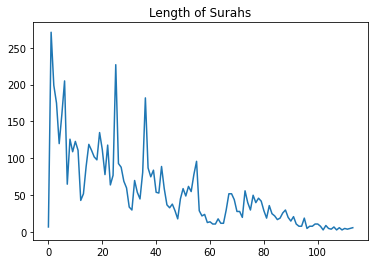

In [12]:
len_of_surahs = []
for i in surah:
    len_of_surahs.append(len(i))

plt.title("Length of Surahs")
plt.plot(len_of_surahs)

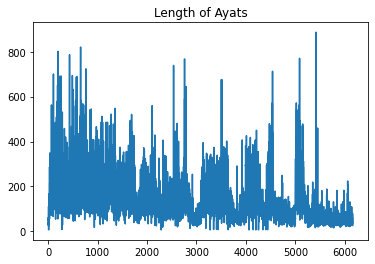

In [13]:
len_of_ayats = []
for i in surah:
    for j in i:
        len_of_ayats.append(len(j))
    
plt.title("Length of Ayats")
plt.plot(len_of_ayats)

# NLP

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(quran)

In [16]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [17]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
        
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [18]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

clean_data = ' '.join(lemmatized_word)
len(clean_data)

451716

In [19]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['quran']
df

script
quran  name allah gracious merciful praise allah cher...

In [20]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [21]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

aaron  abandon  abandoned  abase  abated  abatement  abhor  abide  \
quran     24        3          3      1       1          2      1     21   

       abides  abiding  ...  young  youth  youthful  zaid  zakariya  zaqqum  \
quran       1        2  ...      9      8         1     1         8       3   

       zeal  zihar  zodiacal  zone  
quran     2      3         2     2  

[1 rows x 5211 columns]

In [22]:
data = data_vect_feat.transpose()
data.shape

(5211, 1)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))

key quran, value [('allah', 2760), ('ye', 1942), ('lord', 917), ('say', 779), ('thou', 753), ('said', 705), ('shall', 615), ('thee', 591), ('day', 543), ('people', 516), ('thy', 486), ('believe', 448), ('sign', 412), ('thing', 409), ('earth', 401), ('messenger', 367), ('men', 351), ('sent', 317), ('truth', 310), ('come', 301), ('verily', 299), ('hath', 292), ('know', 291), ('good', 278), ('fear', 264), ('evil', 260), ('heaven', 242), ('faith', 240), ('make', 221), ('turn', 217), ('life', 217), ('penalty', 217), ('book', 210), ('man', 197), ('heart', 195), ('behold', 189), ('way', 188), ('power', 185), ('reject', 181), ('away', 178), ('deed', 176), ('knowledge', 175), ('unbeliever', 175), ('unto', 172), ('moses', 172), ('soul', 170), ('right', 167), ('truly', 166), ('doth', 157), ('mercy', 156), ('reward', 154), ('let', 152), ('created', 150), ('god', 149), ('like', 148), ('garden', 148), ('best', 145), ('clear', 141), ('given', 135), ('worship', 135), ('judgment', 135), ('follow', 134)

In [24]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each 
words = []
for x in data:
    top = [word for (word, count) in top_dict[x]]
    for t in top:
        words.append(t)

print(words[:10])

['allah', 'ye', 'lord', 'say', 'thou', 'said', 'shall', 'thee', 'day', 'people']


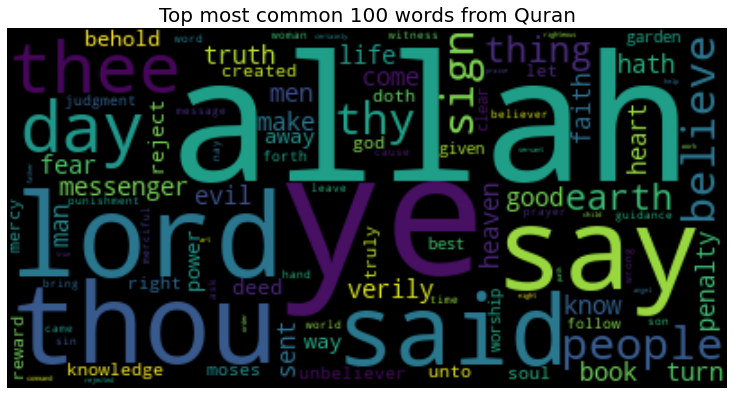

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud, interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Quran",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('topmost.png')

# Sentiment Analysis

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Islam is the best religion!")

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}

In [28]:
sia.polarity_scores(quran)

{'neg': 0.105, 'neu': 0.765, 'pos': 0.13, 'compound': 1.0}

In [29]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    print(s_num, sia.polarity_scores(s))
    s_num+=1

1 {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.9673}
2 {'neg': 0.111, 'neu': 0.765, 'pos': 0.124, 'compound': 0.9993}
3 {'neg': 0.119, 'neu': 0.733, 'pos': 0.148, 'compound': 0.9998}
4 {'neg': 0.121, 'neu': 0.731, 'pos': 0.148, 'compound': 0.9997}
5 {'neg': 0.12, 'neu': 0.768, 'pos': 0.113, 'compound': -0.996}
6 {'neg': 0.105, 'neu': 0.794, 'pos': 0.101, 'compound': -0.993}
7 {'neg': 0.122, 'neu': 0.776, 'pos': 0.102, 'compound': -0.9996}
8 {'neg': 0.11, 'neu': 0.769, 'pos': 0.121, 'compound': 0.8246}
9 {'neg': 0.131, 'neu': 0.74, 'pos': 0.129, 'compound': -0.9389}
10 {'neg': 0.092, 'neu': 0.796, 'pos': 0.112, 'compound': 0.9971}
11 {'neg': 0.102, 'neu': 0.757, 'pos': 0.141, 'compound': 0.9995}
12 {'neg': 0.079, 'neu': 0.805, 'pos': 0.116, 'compound': 0.9994}
13 {'neg': 0.082, 'neu': 0.799, 'pos': 0.119, 'compound': 0.9968}
14 {'neg': 0.105, 'neu': 0.77, 'pos': 0.125, 'compound': 0.9914}
15 {'neg': 0.089, 'neu': 0.8, 'pos': 0.111, 'compound': 0.9835}
16 {'neg': 0.102, 'neu': 

In [30]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [31]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.08534967255499142, subjectivity=0.5377807004615831)

## TEXT SUMMARY

### Summary of Quran

In [55]:
import heapq

In [61]:
def summarise(text):
    sentence_list = nltk.sent_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    word_frequencies = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

    sentence_scores = {}
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

In [62]:
summarise(quran)

'O ye who believe! Behold! He said: "O my people! He said: "O my Lord! He said: "Yea (and more)- for ye shall in that case be (raised to posts) nearest (to my person)." After them succeeded an (evil) generation: They inherited the Book but they chose (for themselves) the vanities of this world saying (for excuse): "(Everything) will be forgiven us." (Iblis) said: "O my Lord!'

### Summary of Surahs

In [63]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    summary = summarise(s)
    if len(summary) < 5:
        print("SURAH NUMBER:",s_num, "SURAH:", s)
    else:
        print("SURAH NUMBER:",s_num, "SUMMARY:", summary)
    print()
    s_num+=1

SURAH NUMBER: 1 SUMMARY: Show us the straight way
The way of those on whom Thou hast bestowed Thy Grace those whose (portion) is not wrath and who go not astray. Praise be to Allah the Cherisher and Sustainer of the worlds;
Most Gracious Most Merciful;
Master of the Day of Judgment. Thee do we worship and Thine aid we seek. In the name of Allah Most Gracious Most Merciful.

SURAH NUMBER: 2 SUMMARY: his Lord said to him: "Bow (thy will to Me):" He said: "I bow (my will) to the Lord and Cherisher of the Universe." The Jews say: "The Christians have naught (to stand) upon; and the Christians say: "The Jews have naught (To stand) upon." O ye who believe! They said: "We shall worship Thy god and the god of thy fathers of Abraham IsmaÂ´il and Isaac- the one (True) Allah: To Him we bow (in Islam)." There came to you Moses with clear (Signs); yet ye worshipped the calf (Even) after that and ye did behave wrongfully. Ramadhan is the (month) in which was sent down the QurÂ´an as a guide to manki

SURAH NUMBER: 12 SUMMARY: The king (of Egypt) said: "I do see (in a vision) seven fat kine whom seven lean ones devour and seven green ears of corn and seven (others) withered. (The king) said (to the ladies): "What was your affair when ye did seek to seduce Joseph from his (true) self?" "Tell us" (they said) "The truth and meaning thereof: for we see thou art one that doth good (to all)." But she in whose house he was sought to seduce him from his (true) self: she fastened the doors and said: "Now come thou (dear one)!" (Joseph) said: "Set me over the store-houses of the land: I will indeed guard them as one that knows (their importance)." They said: "O our father! He (simply) said (to himself): "Ye are the worse situated; and Allah knoweth best the truth of what ye assert!"

SURAH NUMBER: 13 SUMMARY: Mocked were (many) messengers before thee: but I granted respite to the unbelievers and finally I punished them: Then how (terrible) was my requital! If thou dost marvel (at their want o

SURAH NUMBER: 26 SUMMARY: Verily in this is a Sign: but most of them do not believe. Then Pharaoh sent heralds to (all) the Cities
(Saying): "These (Israelites) are but a small band
"And they are raging furiously against us;
"But we are a multitude amply fore-warned." And verily thy Lord is He the Exalted in Might Most Merciful. He said: "Yea (and more)- for ye shall in that case be (raised to posts) nearest (to my person)." "No reward do I ask of you for it: my reward is only from the Lord of the Worlds. They said: "Keep him and his brother in suspense (for a while) and dispatch to the Cities heralds to collect-
"And bring up to thee all (our) sorcerers well-versed." "And fear Him Who created you and (who created) the generations before (you)"
They said: "Thou art only one of those bewitched!

SURAH NUMBER: 27 SUMMARY: (We also sent) Lut (as a messenger): behold He said to his people "Do ye do what is shameful though ye see (its iniquity)? "Go thou with this letter of mine and deliver

SURAH NUMBER: 38 SUMMARY: (The command was given:) "Strike with thy foot: here is (water) wherein to wash cool and refreshing and (water) to drink." but - for the wrong-doers will be an evil place of (Final) Return!-
Hell!- they will burn therein - an evil bed (indeed to lie on)!-
Yea such! (Iblis) said: "Then by Thy power I will put them all in the wrong-
"Except Thy Servants amongst them sincere and purified (by Thy Grace)." (The followers shall cry to the misleaders:) "Nay ye (too)! "...and David gathered that We had tried him: he asked forgiveness of his Lord fell down bowing (in prostration) and turned (to Allah in repentance). Forgive me and grant me a kingdom which (it may be) suits not another after me: for Thou art the Grantor of Bounties (without measure). So We forgave him this (lapse): he enjoyed indeed a Near Approach to Us and a beautiful place of (Final) Return.

SURAH NUMBER: 39 SUMMARY: That lofty mansions one above another have been built: beneath them flow rivers (of

SURAH NUMBER: 55 SUMMARY: Then which of the favours of your Lord will ye deny? a flame of fire (to burn) and a smoke (to choke): no defence will ye have:
Then which of the favours of your Lord will ye deny? And besides these two there are two other Gardens-
Then which of the favours of your Lord will ye deny?-
Dark-green in colour (from plentiful watering). (He is) Lord of the two Easts and Lord of the two Wests:
Then which of the favours of your Lord will ye deny? In them (each) will be two Springs pouring forth water in continuous abundance:
Then which of the favours of your Lord will ye deny? Of Him seeks (its need) every creature in the heavens and on earth: every day in (new) Splendour doth He (shine)! And the Firmament has He raised high and He has set up the Balance (of Justice)
In order that ye may not transgress (due) balance.

SURAH NUMBER: 56 SUMMARY: We have decreed Death to be your common lot and We are not to be frustrated
from changing your Forms and creating you (again)

SURAH NUMBER: 69 SUMMARY: (The stern command will say): "Seize ye him and bind ye him
"And burn ye him in the Blazing Fire. "Eat ye and drink ye with full satisfaction; because of the (good) that ye sent before you in the days that are gone!" "I did really understand that my Account would (One Day) reach me!" "And that I had never realised how my account (stood)! And disobeyed (each) the messenger of their Lord; so He punished them with an abundant Penalty. And he will be in a life of Bliss
In a Garden on high
The Fruits whereof (will hang in bunches) low and near. And We certainly know that there are amongst you those that reject (it).

SURAH NUMBER: 70 SUMMARY: for it would be the Fire of Hell!-
Plucking out (his being) right to the skull!-
Inviting (all) such as turn their backs and turn away their faces (from the Right). They see the (Day) indeed as a far-off (event):
But We see it (quite) near. The angels and the spirit ascend unto him in a Day the measure whereof is (as) fifty th

SURAH NUMBER: 90 SUMMARY: I do call to witness this City;-
And thou art a freeman of this City;-
And (the mystic ties of) parent and child;-
Verily We have created man into toil and struggle. Have We not made for him a pair of eyes?-
And a tongue and a pair of lips?-
And shown him the two highways? Then will he be of those who believe and enjoin patience (constancy and self-restraint) and enjoin deeds of kindness and compassion. He may say (boastfully); Wealth have I squandered in abundance! But those who reject Our Signs they are the (unhappy) Companions of the Left Hand. On them will be Fire vaulted over (all round). But he hath made no haste on the path that is steep.

SURAH NUMBER: 91 SUMMARY: The Thamud (people) rejected (their prophet) through their inordinate wrong-doing
Behold the most wicked man among them was deputed (for impiety). So their Lord on account of their crime obliterated their traces and made them equal (in destruction high and low)! Then they rejected him (as a f